In [2]:
# Importing all the necessary libraries
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# Loading data 
irisData = load_iris() 

# Create feature and target arrays 
X = irisData.data 
y = irisData.target 
  
# Printing Data shape    
print('X matrix dimensionality:', X.shape)
print('Y vector dimensionality:', y.shape)

X matrix dimensionality: (150, 4)
Y vector dimensionality: (150,)


In [10]:
# Split into training dataset and test dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=5) 

In [11]:
# Model Building
knn = KNeighborsClassifier(n_neighbors=4) 
# Here we can specify 4 things: n_neighbors, weights, algorithm and metric.
  
# Fitting the model
knn.fit(X_train, y_train) 
  
# Predict on dataset which model has not seen before 
y_pred = knn.predict(X_test)
print(y_pred) 

[1 2 2 0 2 1 0 2 0 1 1 2 2 2 0 0 2 2 0 0 1 2 0 2 1 2 1 1 1 2 0 1 1 0 1 0 0
 2]


In [12]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[12,  0,  0],
       [ 0, 12,  2],
       [ 0,  0, 12]])

In [37]:
# 15-fold (cv=15) cross-validation with K=4 (n_neighbors=4) for KNN (the n_neighbors parameter)

# Instantiate model
knn = KNeighborsClassifier(n_neighbors=4)

# cross_val_score takes care of splitting X and y into the 15 folds that's why we pass X and y entirely instead of X_train and y_train
scores = cross_val_score(knn, X, y, cv=15, scoring='accuracy')
print(scores)

[1.  1.  0.9 1.  1.  1.  0.7 1.  1.  0.9 0.9 1.  1.  1.  1. ]


In [38]:
# Mean Score
print(scores.mean())

0.9600000000000001


In [15]:
# Searching for an optimal value of K for KNN

# list of scores from k_range
k_range = range(1, 15) 

# List to store scores
k_scores = []

# Looping through values of k
for k in k_range:
    # Running KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # Obtaining cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=15, scoring='accuracy')
    # Appending mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.9600000000000001, 0.9466666666666668, 0.9600000000000001, 0.9600000000000001, 0.9733333333333333, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9866666666666667]


Text(0, 0.5, 'Cross-Validated Accuracy')

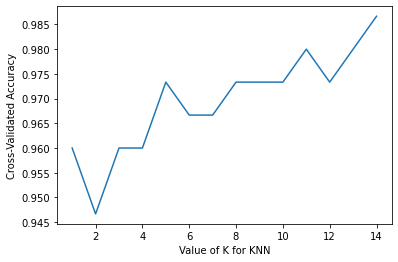

In [16]:
# Ploting the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [17]:
# Optimum model
knn = KNeighborsClassifier(n_neighbors=14)

# Printing Scores
print(scores)

[1.  1.  0.9 1.  1.  1.  1.  1.  1.  0.9 1.  1.  1.  1.  1. ]


In [18]:
# Printing mean scores
print(scores.mean())

0.9866666666666667
